#Final Exam

For the final exam, you need to use the code below and make experiments with different hyperparameter settings (number of neurons, activation function, optimizer, learning rate, batch size, and epochs). 

You need to make 10 different experiments and record the parameter settings for each experiment, as well as the obtained results.

On the project defence, you will need to understand the code and answer questions related to specific part of the code, neural networks and hyperparameters. For example, what is Sigmoid function, how it works, what computations are performed in neurons, etc.

You will need to turn in your *.ipynb file and the recorded results in excel spreadsheeet 24h before the exam.

In [113]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [114]:
# Define a transform to normalize the data

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

## Building the network

Each image in MNIST is 28x28 which is a total of 784 pixels, and there are 10 classes. 

In [115]:
class Network(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p=0.5):
        ''' Builds a feedforward network with arbitrary hidden layers.
        
            Arguments
            ---------
            input_size: integer, size of the input
            output_size: integer, size of the output layer
            hidden_layers: list of integers, the sizes of the hidden layers
            drop_p: float between 0 and 1, dropout probability
        '''
        super().__init__()
        # Add the first layer, input to a hidden layer
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
        
        # Add a variable number of more hidden layers
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        
        self.output = nn.Linear(hidden_layers[-1], output_size)
        
        self.dropout = nn.Dropout(p=drop_p)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        # Forward through each layer in `hidden_layers`, with ReLU activation and dropout
        for linear in self.hidden_layers:
            x = F.relu(linear(x))
            #activation function
            x = self.dropout(x)
        
        x = self.output(x)
        
        return F.log_softmax(x, dim=1)

# Train the network


In [116]:
# Create the network, define the criterion and optimizer
model = Network(784, 10, [516, 256], drop_p=0.5)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) 
#learning rate
#optim adam SGD Adam

In [117]:
# Implement a function for the validation pass
def validation(model, testloader, criterion):
    test_loss = 0
    accuracy = 0
    for images, labels in testloader:

        images.resize_(images.shape[0], 784)

        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        # we get the log probability from the forward pass and take the exponential
        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return test_loss, accuracy

In [123]:
epochs = 4
#range betwen
steps = 0
running_loss = 0
print_every = 40


for e in range(epochs):

  model.train()
  for images, labels in trainloader:
    steps += 1
        
    # Flatten images into a 784 long vector
    images.resize_(images.size()[0], 784)
        
    optimizer.zero_grad()
        
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
        
    running_loss += loss.item()
        
    if steps % print_every == 0:
      # Make sure network is in eval mode for inference
      model.eval()
            
      # Turn off gradients for validation, saves memory and computations
      with torch.no_grad():
        test_loss, accuracy = validation(model, testloader, criterion)
                
        print("Epoch: {}/{}.. ".format(e+1, epochs),\
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),\
                  "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),\
                  "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
            
        running_loss = 0
            
        # Make sure training is back on
        model.train()

Epoch: 1/4..  Training Loss: 0.230..  Test Loss: 0.128..  Test Accuracy: 0.962
Epoch: 1/4..  Training Loss: 0.243..  Test Loss: 0.132..  Test Accuracy: 0.961
Epoch: 1/4..  Training Loss: 0.231..  Test Loss: 0.127..  Test Accuracy: 0.961
Epoch: 1/4..  Training Loss: 0.242..  Test Loss: 0.137..  Test Accuracy: 0.959
Epoch: 1/4..  Training Loss: 0.254..  Test Loss: 0.132..  Test Accuracy: 0.960
Epoch: 1/4..  Training Loss: 0.228..  Test Loss: 0.141..  Test Accuracy: 0.958
Epoch: 1/4..  Training Loss: 0.217..  Test Loss: 0.129..  Test Accuracy: 0.959
Epoch: 1/4..  Training Loss: 0.225..  Test Loss: 0.131..  Test Accuracy: 0.960
Epoch: 1/4..  Training Loss: 0.236..  Test Loss: 0.136..  Test Accuracy: 0.960
Epoch: 1/4..  Training Loss: 0.240..  Test Loss: 0.130..  Test Accuracy: 0.961
Epoch: 1/4..  Training Loss: 0.236..  Test Loss: 0.142..  Test Accuracy: 0.956
Epoch: 1/4..  Training Loss: 0.245..  Test Loss: 0.127..  Test Accuracy: 0.961
Epoch: 1/4..  Training Loss: 0.239..  Test Loss: 0.1

## Inference

Now that the model is trained, you can use it for inference. You need to set the model in inference mode with `model.eval()`. You'll also want to turn off autograd with the `torch.no_grad()` context.

In [119]:
# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

In [120]:
ps

tensor([[5.8814e-11, 1.5342e-04, 4.7614e-06, 9.9974e-01, 1.1505e-07, 5.7978e-05,
         2.5402e-11, 4.2008e-07, 2.7943e-05, 1.4944e-05]])

In [121]:

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

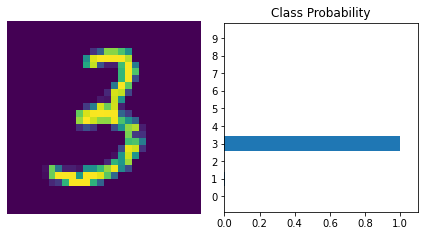

In [122]:
view_classify(img.view(1, 28, 28), ps)